This notebook is adapted from here: https://www.tensorflow.org/get_started/summaries_and_tensorboard

With TensorBoard, you have to set things up in summaries, then add those summaries to a FileWriter.  The FileWriter will write whatever you tell it to summarize to a directory.  You then start TensorBoard by entering the following at a command prompt:

`tensorboard --logdir=/path/to/logs`

**NOTE** - If you don't have the boston.pickle file in your directory, run the data prep script with python like so:

`python data_prep.py`

In [1]:
# imports

import pandas as pd
import os
import tensorflow as tf
import numpy as np
import random
from matplotlib import pyplot as plt

In [2]:
root_dir = "."
pickle_file = "boston.pickle"
df = pd.read_pickle(os.sep.join([root_dir, pickle_file]))

In [3]:
column_names = list(df.columns)

In [4]:
hold_out = np.random.choice(range(0, df.shape[0]), size=round(0.3 * df.shape[0]), replace=False)

In [5]:
# randomize 
random.seed(42)
df2 = df.sample(frac=1)

In [6]:
hold_out = round(0.3 * df2.shape[0])
df_test_valid = df2.iloc[:hold_out, :]
df_train = df2.iloc[hold_out:, :]

In [7]:
test_valid_split = 0.5
n_test_valid = round(test_valid_split * df_test_valid.shape[0])
df_test = df_test_valid.iloc[:n_test_valid, :]
df_valid = df_test_valid.iloc[n_test_valid:, :]

In [8]:
assert df_train.shape[0] + df_test.shape[0] + df_valid.shape[0] == df.shape[0]

In [9]:
Y_ = df_train["MEDV"].values
df_train.drop("MEDV", axis=1, inplace=True)

/Users/mcloney/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [10]:
# xxx = df_train["CRIM"]
def normalize(seriez):
    """
    Given a set of values (like a pd.Series or pd.DataFrame column), I normalize
    them using ptp (point-to-point) to account for negative values.
    """
    return (seriez - seriez.min(0)) / seriez.ptp(0)

srz = {}
for j in column_names[:-1]:
    srz[j] = normalize(df_train[j])

In [11]:
Y_normal = normalize(Y_)
df_train_normal = pd.DataFrame(srz)

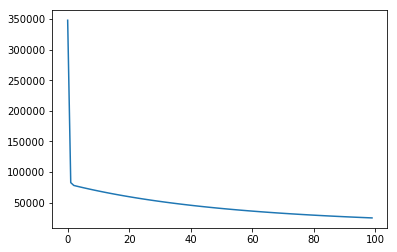

In [12]:
# THIS IS THE GOOD ONE??

num_vars = df_train_normal.shape[1]
num_predictions = Y_normal.shape[0]

# Model params
w = tf.Variable(tf.random_normal([1, num_vars]), name='w')
b = tf.Variable(tf.zeros([1, num_vars]), name='b')

# Model input and output
x = tf.placeholder(tf.float32, [None, num_vars], name='x')
y = tf.placeholder(tf.float32, [None, num_predictions], name='y')

linear_model = tf.reduce_sum(x * w + b, axis=1, name='out', keep_dims=True)

# Loss as sum(error^2)
loss = tf.reduce_sum(tf.square(linear_model - y), name='loss')

# Create optimizer
optimizer = tf.train.GradientDescentOptimizer(0.00000005)
train = optimizer.minimize(loss, name='train')

# Define training data
x_train = np.array(df_train_normal)
y_train = Y_normal.reshape(-1, 354)


# Create session and init parameters
sess = tf.Session()
sess.run(tf.global_variables_initializer())

losses = []
# Training loop
train_data = {x: x_train, y: y_train}
for i in range(1000):
    _, losser = sess.run([train, loss], train_data)
    
    if i % 10 == 0:
        losses.append(losser)

# sess.run([w, b, loss, linear_model], train_data)
# Eval solution
# w_est, b_est, curr_loss, y_pred = sess.run([w, b, loss, linear_model], train_data)
# print("w: %s b: %s loss: %s" % (w_est, b_est, curr_loss))
# print("y_pred: %s" % (y_pred,))

plt.plot(losses)
plt.show()

In [13]:
# get the last value in the losses list
losses[-1]

25103.07